# Visualisation de données en Python

Il existe différentes bibliothèques pour visualiser des données en Python :

- Matplotlib (+ 55 000 questions sur Stackoverflow) : https://matplotlib.org/

- Plotly (+ 8 000 questions sur Stackoverflow) : https://plotly.com/python/

- Seaborn (+ 6 000 questions sur Stackoverflow) : https://seaborn.pydata.org/

- Bokeh (+ 4 000 questions sur Stackoverflow) : https://docs.bokeh.org/en/latest/

- Altair (+ 600 questions sur Stackoverflow) : https://altair-viz.github.io/

Dans la suite de l'activité, on utilisera les bibliothèques `matplotlib` et `seaborn`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Données sur les bibliothèques de visualisation de données
data = {
    "Nom de la bibliothèques" : ["matplotlib", "plotly", "seaborn", "bokeh", "altair"],
    "Nombre de questions sur Stackoverflow" : [55000, 8000, 6000, 4000, 600],
}
df_visu = pd.DataFrame(data)
df_visu

Nom de la bibliothèques  Nombre de questions sur Stackoverflow
0              matplotlib                                  55000
1                  plotly                                   8000
2                 seaborn                                   6000
3                   bokeh                                   4000
4                  altair                                    600

#### ACTIVITE

- A l'aide de matplotlib, créer un diagramme à barres verticales pour représenter le nombre de questions par bibliothèque avec le nom des axes et un titre. Agrandir le graphique pour le rendre plus lisible.

- Même chose avec seaborn mais avec un diagramme à barres horizontales

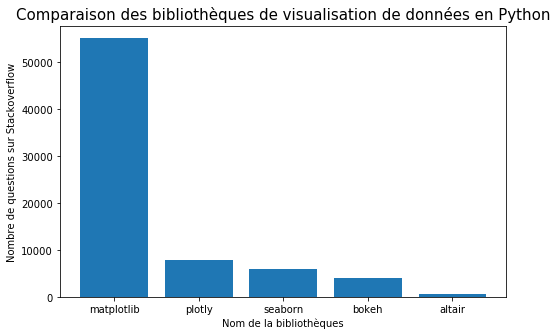

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df_visu["Nom de la bibliothèques"], df_visu["Nombre de questions sur Stackoverflow"])
ax.set_ylabel("Nombre de questions sur Stackoverflow")
ax.set_xlabel("Nom de la bibliothèques")
ax.set_title("Comparaison des bibliothèques de visualisation de données en Python", fontsize=15)
plt.show()

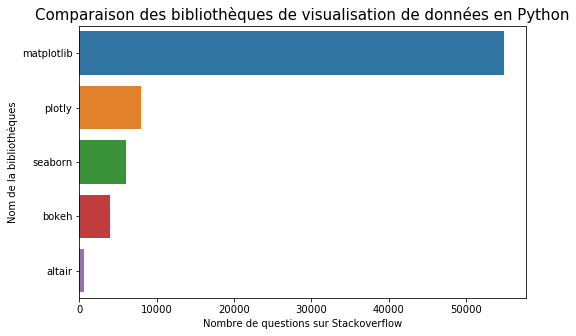

In [14]:
plt.figure(figsize=(8, 5))
plot = sns.barplot(y="Nom de la bibliothèques", x="Nombre de questions sur Stackoverflow", data=df_visu, orient="h")
plot.set_title("Comparaison des bibliothèques de visualisation de données en Python", fontsize=15)
plt.show()

## Les différents types de graphiques

### Les nuages de points (scatter plots)

Jeu de données utilisé : ensemble des effectifs scolaires entre 2012 et 2016

Source : https://data.metropolegrenoble.fr/ckan/dataset/recapitulatif-des-effectifs-scolaires-de-grenoble-depuis-2012

In [75]:
df = pd.read_csv("http://entrepot.metropolegrenoble.fr/opendata/38185-GRE/Education/csv/EDUCATION_EFFECTIF_SCOLAIRE_VDG_2012-2017.csv")
df.head()

ANNEE_SCOLAIRE MAT_ELEM                          NOM  TPS  PS  MS  GS  CP  \
0      2012-2013     ELEM  ALPHONSE DAUDET ELEMENTAIRE    0   0   0   0  43   
1      2012-2013      MAT   ALPHONSE DAUDET MATERNELLE    3  59  50  45   0   
2      2012-2013     ELEM  AMPERE PRIMAIRE ELEMENTAIRE    0   0   0   0  57   
3      2012-2013      MAT   AMPERE PRIMAIRE MATERNELLE    0  27  28  29   0   
4      2012-2013     ELEM   ANATOLE FRANCE ELEMENTAIRE    0   0   0   0  50   

   CE1  CE2  CM1  CM2  CLIN  CLISMAT  CLISELEM  
0   43   42   39   28     0        0        12  
1    0    0    0    0     0        0         0  
2   50   49   49   47     0        0         0  
3    0    0    0    0     0        0         0  
4   28   35   35   21     0        0         0

#### ACTIVITE

- Créer un nuage de points du nombre d'élèves en CE2 en fonction du nombre d'élèves en CE1

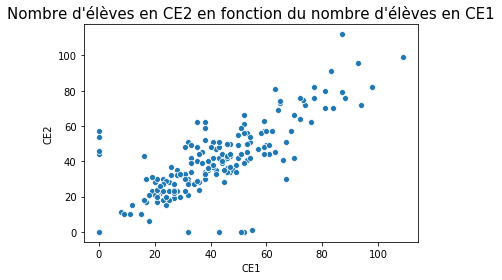

In [76]:
plot = sns.scatterplot(data=df, x="CE1", y="CE2")
plot.set_title("Nombre d'élèves en CE2 en fonction du nombre d'élèves en CE1", fontsize=15)
plt.show()

### Les lignes (line plots)

Jeu de données utilisé : nombre d'inscrits annuels par bibliothèque entre 2008 entre 2016

Source : https://data.metropolegrenoble.fr/ckan/dataset/statistiques-des-bibliotheques-de-grenoble/

In [18]:
df = pd.read_csv("http://entrepot.metropolegrenoble.fr/opendata/38185-GRE/Bibliotheque/csv/BIBLIOTHEQUES_INSCRITS_VDG.csv", encoding = "ISO-8859-1")
df.head()

Bibliothèque  2008  2009  2010  2011  2012  2013  2014  2015  2016
0         BMEI     0     0     0     0     0     0     0     0     0
1         ABBA  2614  2474  2369  2324  2351  2187  2274  2217  2183
2         ALLI  2715  2691  2676  2623  2702  2667  2659  3389  2474
3         ARLE  2045  2039  1948  1919  2112  1989  1912  1899  1957
4         BCSI  2239  2239  2225  2244  2309  2113  1897  1796  1171

#### ACTIVITE

- Créer un dataframe avec la somme des inscrits pour toutes les bibliothèques par année

- Créer une courbe du nombre total d'inscrits en bibliothèque en fonction de l'année

In [19]:
df_sum = df.drop("Bibliothèque", axis=1).sum()
df_sum = df_sum.to_frame().reset_index().rename(columns={"index": "Année", 0: "Nombre inscrits"})

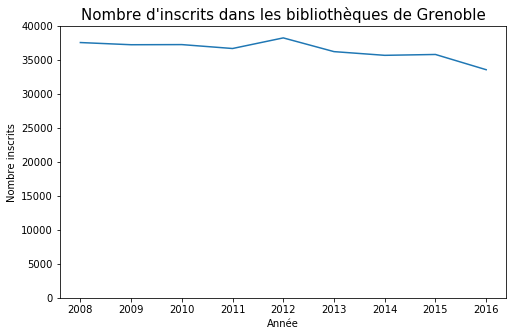

In [22]:
plt.figure(figsize=(8, 5))
plot = sns.lineplot(data=df_sum, x="Année", y="Nombre inscrits")
plot.set_ylim(0, 40000)
plot.set_title("Nombre d'inscrits dans les bibliothèques de Grenoble", fontsize=15)
plt.show()

### Les camemberts (Pie charts) et donuts

Jeu de données utilisé : bornes de recharge pour véhicules électriques sur le territoire du SMMAG (Métropole de Grenoble + Grésivaudan + Pays Voironnais)

Source :  https://data.metropolegrenoble.fr/ckan/dataset/bornes-de-recharge-pour-vehicules-electriques

In [23]:
df = pd.read_csv("https://data.mobilites-m.fr/api/normes/irve", sep=";")
df.head()

n_amenageur                    n_operateur n_enseigne         id_station  \
0         NaN  BOUYGUES ENERGIES ET SERVICES   Grenoble  FR*M38*P38421*001   
1         NaN  BOUYGUES ENERGIES ET SERVICES   Grenoble  FR*M38*P38185*002   
2         NaN  BOUYGUES ENERGIES ET SERVICES   Grenoble  FR*M38*P38185*002   
3         NaN  BOUYGUES ENERGIES ET SERVICES   Grenoble  FR*M38*P38185*018   
4         NaN  BOUYGUES ENERGIES ET SERVICES   Grenoble  FR*M38*P38485*001   

                                     n_station  \
0  SAINT-MARTIN-D'HERES - Avenue Centrale - BU   
1             GRENOBLE - Rue Jacquard - Balzac   
2             GRENOBLE - Rue Jacquard - Balzac   
3                        GRENOBLE - Rue Thiers   
4            SEYSSINET-PARISET - Rue Lamartine   

                                   ad_station  code_insee  Xlongitude  \
0  Avenue Centrale 38400 SAINT-MARTIN-D'HERES       38421    5.769781   
1                 Rue Jacquard 38000 GRENOBLE       38185    5.724746   
2                 Rue Jacquard 38000 GRENOBLE       38185    5.724746   
3                   Rue Thiers 38000 GRENOBLE       38185    5.719674   
4       Rue Lamartine 38170 SEYSSINET-PARISET       38485    5.695541   

   Ylatitude  nbre_pdc               id_pdc  puiss_max       type_prise  \
0   45.19160       1.0  FR*M38*E38421*001*1       22.0          EF - T2   
1   45.17461       1.0  FR*M38*E38185*002*1       22.0          EF - T2   
2   45.17461       1.0  FR*M38*E38185*002*2       22.0  CHADEMO - COMBO   
3   45.18509       1.0  FR*M38*E38185*018*1       22.0          EF - T2   
4   45.17999       1.0  FR*M38*E38485*001*2       22.0  CHADEMO - COMBO   

  acces_recharge accessibilité  \
0         payant   24h/24 7j/7   
1         payant   24h/24 7j/7   
2         payant   24h/24 7j/7   
3         payant   24h/24 7j/7   
4         payant   24h/24 7j/7   

                                        observations    date_maj  
0  Recharge par badge et avec une application sma...  2020/10/07  
1  Recharge par badge et avec une application sma...  2020/10/07  
2  Recharge par badge et avec une application sma...  2020/10/07  
3  Recharge par badge et avec une application sma...  2020/10/07  
4  Recharge par badge et avec une application sma...  2020/10/07

#### ACTIVITE

- Créer le diagramme circulaire des différents types de prises

- Même question avec le donut chart

- Créer une carte (folium) avec la position des bornes de recharge 

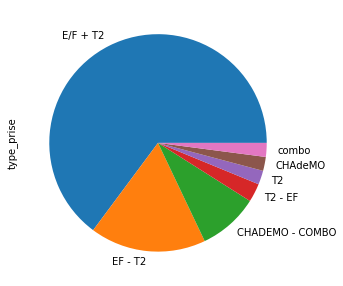

In [31]:
plt.figure(figsize=(8, 5))
df["type_prise"].value_counts().plot(kind='pie')
plt.show()

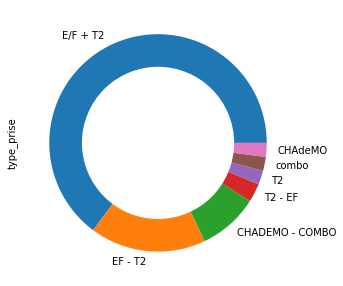

In [42]:
plt.figure(figsize=(8, 5))
df["type_prise"].value_counts().plot(kind='pie')
centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [85]:
import folium
from folium.plugins import MarkerCluster

LAT_GRE = 45.188529
LONG_GRE = 5.724524

m = folium.Map(location=[LAT_GRE, LONG_GRE], zoom_start=12)
marker_cluster = MarkerCluster()
for row in df.itertuples():
    folium.Marker(location=[row.Ylatitude, row.Xlongitude], popup=row.n_station).add_to(marker_cluster)
marker_cluster.add_to(m)

m

### Les histogrammes

Jeu de données utilisé : les différents taux d'imposition (TEOM, TH, FNB, TFB) des communes de l'agglomération grenobloise

Source : https://data.metropolegrenoble.fr/ckan/dataset/taux-d-imposition-communes-agglomeration


In [88]:
df = pd.read_csv("http://entrepot.metropolegrenoble.fr/opendata/Imposition/imposition.csv", encoding = "ISO-8859-1", sep=";")
df.head()

Commune                type  annee    taux
0  Bresson  Taux FNB 2000-2014   2000  0.2667
1  Bresson  Taux FNB 2000-2014   2001  0.4013
2  Bresson  Taux FNB 2000-2014   2002  0.4263
3  Bresson  Taux FNB 2000-2014   2003  0.4348
4  Bresson  Taux FNB 2000-2014   2004  0.4412

#### ACTIVITE

- Calculer les taux moyens par commune

- Créer l'histogramme des taux

In [97]:
df_taux = df.groupby(by=["Commune"]).mean()["taux"]
df_taux = df_taux.to_frame().reset_index()
df_taux

Commune      taux
0                           Bresson  0.213514
1                  Brié-et-Angonnes  0.176686
2                    Champ-sur-Drac  0.287657
3                       Champagnier  0.182171
4                             Claix  0.359796
5                            Corenc  0.161369
6                            Domène  0.309373
7                        Echirolles  0.347141
8                            Eybens  0.367868
9                          Fontaine  0.366623
10                           Gières  0.339510
11                         Grenoble  0.379010
12                          Herbeys  0.244743
13                           Jarrie  0.223657
14                       La Tronche  0.285660
15            Le Fontanil-Cornillon  0.228575
16                           Le Gua  0.143020
17                          Le Gua   0.608400
18          Le Sappey-en-Chartreuse  0.279257
19                           Meylan  0.291159
20                Miribel-Lanchâtre  0.263969
21                Mont-Saint-Martin  0.208514
22                      Montchaboud  0.325514
23                       Murianette  0.296276
24           Notre-Dame-de-Commiers  0.440914
25             Notre-Dame-de-Mésage  0.208257
26                          Noyarey  0.320863
27                           Poisat  0.375439
28                    Pont-de-Claix  0.259386
29                      Proveysieux  0.242743
30              Quaix-en-Chartreuse  0.238029
31  Saint-Barthélémy-de-Séchilienne  0.264600
32                     Saint-Egrève  0.324479
33        Saint-Georges-de-Commiers  0.336671
34             Saint-Martin-d'Hères  0.394054
35           Saint-Martin-le-Vinoux  0.310353
36             Saint-Paul-de-Varces  0.231189
37           Saint-Pierre-de-Mésage  0.263257
38                         Sarcenas  0.242886
39                        Sassenage  0.320107
40                Seyssinet-Pariset  0.317918
41                         Seyssins  0.343687
42                      Séchilienne  0.288343
43        Varces-Allières-et-Risset  0.260934
44                Vaulnaveys-le-Bas  0.209400
45               Vaulnaveys-le-Haut  0.255429
46                            Venon  0.248615
47                   Veurey-Voroize  0.202071
48                              Vif  0.252794
49                          Vizille  0.324114

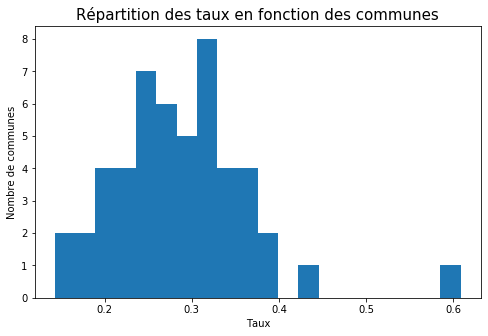

In [107]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_taux["taux"], bins=20)
ax.set_ylabel("Nombre de communes")
ax.set_xlabel("Taux")
ax.set_title("Répartition des taux en fonction des communes", fontsize=15)
plt.show()

### Les boites à moustaches (box plots)

Même jeu de données que pour les histogrammes

In [15]:
df = pd.read_csv("http://entrepot.metropolegrenoble.fr/opendata/Imposition/imposition.csv", encoding = "ISO-8859-1", sep=";")
df.head()

Commune                type  annee    taux
0  Bresson  Taux FNB 2000-2014   2000  0.2667
1  Bresson  Taux FNB 2000-2014   2001  0.4013
2  Bresson  Taux FNB 2000-2014   2002  0.4263
3  Bresson  Taux FNB 2000-2014   2003  0.4348
4  Bresson  Taux FNB 2000-2014   2004  0.4412

#### ACTIVITE

- Créer un dataframe avec une colonne pour la taxe d'habitation par année

- Créer des boites à moustaches pour ces colonnes

In [16]:
df_th = df[df["type"]=="Taux TH 2000-2014"].pivot_table(columns=["type", "annee"], index="Commune", values=["taux"])
df_th.columns = df_th.columns.droplevel().droplevel()
df_th

annee                              2000    2001    2002    2003    2004  \
Commune                                                                   
Bresson                          0.0531  0.0816  0.1066  0.1087  0.1103   
Brié-et-Angonnes                    NaN     NaN     NaN     NaN     NaN   
Champ-sur-Drac                      NaN     NaN     NaN     NaN     NaN   
Champagnier                         NaN     NaN     NaN     NaN     NaN   
Claix                            0.1150  0.1171  0.1312  0.1351  0.1392   
Corenc                           0.0848  0.0862  0.0879  0.0921  0.0961   
Domène                           0.1010  0.1030  0.1106  0.1149  0.1172   
Echirolles                       0.0973  0.0973  0.0990  0.1005  0.1025   
Eybens                           0.1328  0.1328  0.1458  0.1458  0.1458   
Fontaine                         0.1718  0.1727  0.1789  0.1825  0.1859   
Gières                           0.1402  0.1402  0.1514  0.1514  0.1514   
Grenoble                         0.1974  0.1974  0.1974  0.1974  0.1974   
Herbeys                             NaN     NaN     NaN     NaN     NaN   
Jarrie                              NaN     NaN     NaN     NaN     NaN   
La Tronche                       0.1152  0.1163  0.1221  0.1221  0.1267   
Le Fontanil-Cornillon            0.0524  0.0524  0.0550  0.0550  0.0550   
Le Gua                           0.0898  0.0898  0.0898  0.0898  0.0898   
Le Sappey-en-Chartreuse             NaN     NaN     NaN     NaN     NaN   
Meylan                           0.1258  0.1258  0.1258  0.1258  0.1258   
Miribel-Lanchâtre                   NaN     NaN     NaN     NaN     NaN   
Mont-Saint-Martin                   NaN     NaN     NaN     NaN     NaN   
Montchaboud                         NaN     NaN     NaN     NaN     NaN   
Murianette                       0.0967  0.0967  0.1067  0.1067  0.1073   
Notre-Dame-de-Commiers              NaN     NaN     NaN     NaN     NaN   
Notre-Dame-de-Mésage                NaN     NaN     NaN     NaN     NaN   
Noyarey                          0.0985  0.0985  0.0985  0.0985  0.0985   
Poisat                           0.1428  0.1428  0.1428  0.1428  0.1428   
Pont-de-Claix                    0.0964  0.0964  0.1050  0.1140  0.1175   
Proveysieux                         NaN     NaN     NaN     NaN     NaN   
Quaix-en-Chartreuse                 NaN     NaN     NaN     NaN     NaN   
Saint-Barthélémy-de-Séchilienne     NaN     NaN     NaN     NaN     NaN   
Saint-Egrève                     0.1450  0.1460  0.1465  0.1474  0.1474   
Saint-Georges-de-Commiers           NaN     NaN     NaN     NaN     NaN   
Saint-Martin-d'Hères             0.2045  0.2045  0.2045  0.2092  0.2092   
Saint-Martin-le-Vinoux           0.1547  0.1547  0.1586  0.1634  0.1667   
Saint-Paul-de-Varces             0.1334  0.1334  0.1334  0.1334  0.1334   
Saint-Pierre-de-Mésage              NaN     NaN     NaN     NaN     NaN   
Sarcenas                            NaN     NaN     NaN     NaN     NaN   
Sassenage                        0.1588  0.1588  0.1779  0.1779  0.1815   
Seyssinet-Pariset                0.1216  0.1216  0.1240  0.1270  0.1295   
Seyssins                         0.0877  0.0881  0.0899  0.0928  0.0947   
Séchilienne                         NaN     NaN     NaN     NaN     NaN   
Varces-Allières-et-Risset        0.0710  0.0731  0.0768  0.0768  0.0768   
Vaulnaveys-le-Bas                   NaN     NaN     NaN     NaN     NaN   
Vaulnaveys-le-Haut                  NaN     NaN     NaN     NaN     NaN   
Venon                               NaN     NaN     NaN     NaN     NaN   
Veurey-Voroize                   0.0680  0.0714  0.0750  0.0825  0.0825   
Vif                              0.1175  0.1175  0.1234  0.1295  0.1295   
Vizille                             NaN     NaN     NaN     NaN     NaN   

annee                              2005    2006    2007    2008    2009  \
Commune                                                                   
Bresson                 

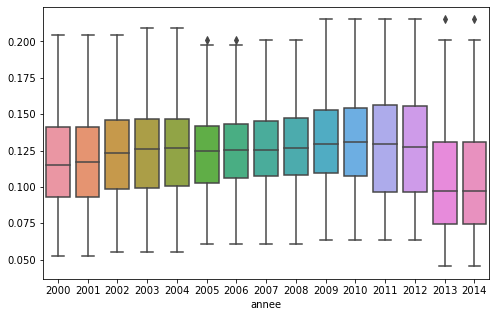

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_th)
plt.show()